<a href="https://colab.research.google.com/github/chonamwoo/Data-Analysis/blob/main/temperature_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns

df =pd.read_csv('./temps.csv')

In [2]:
print(df.head())
print(df.shape)

   year  month  day  week  temp_2  temp_1  average  actual  forecast_noaa  \
0  2016      1    1   Fri      45      45     45.6      45             43   
1  2016      1    2   Sat      44      45     45.7      44             41   
2  2016      1    3   Sun      45      44     45.8      41             43   
3  2016      1    4   Mon      44      41     45.9      40             44   
4  2016      1    5  Tues      41      40     46.0      44             46   

   forecast_acc  forecast_under  friend  
0            50              44      29  
1            50              44      61  
2            46              47      56  
3            48              46      53  
4            46              46      41  
(348, 12)


In [3]:
print(df.info()) # no missing values
print(df.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB
None
                count         mean        std     min       25%     50%  \
year            348.0  2016.000000   0.000000  2016.0  2016.000  2016.0   
month           348.0     6.477011   3.498380 

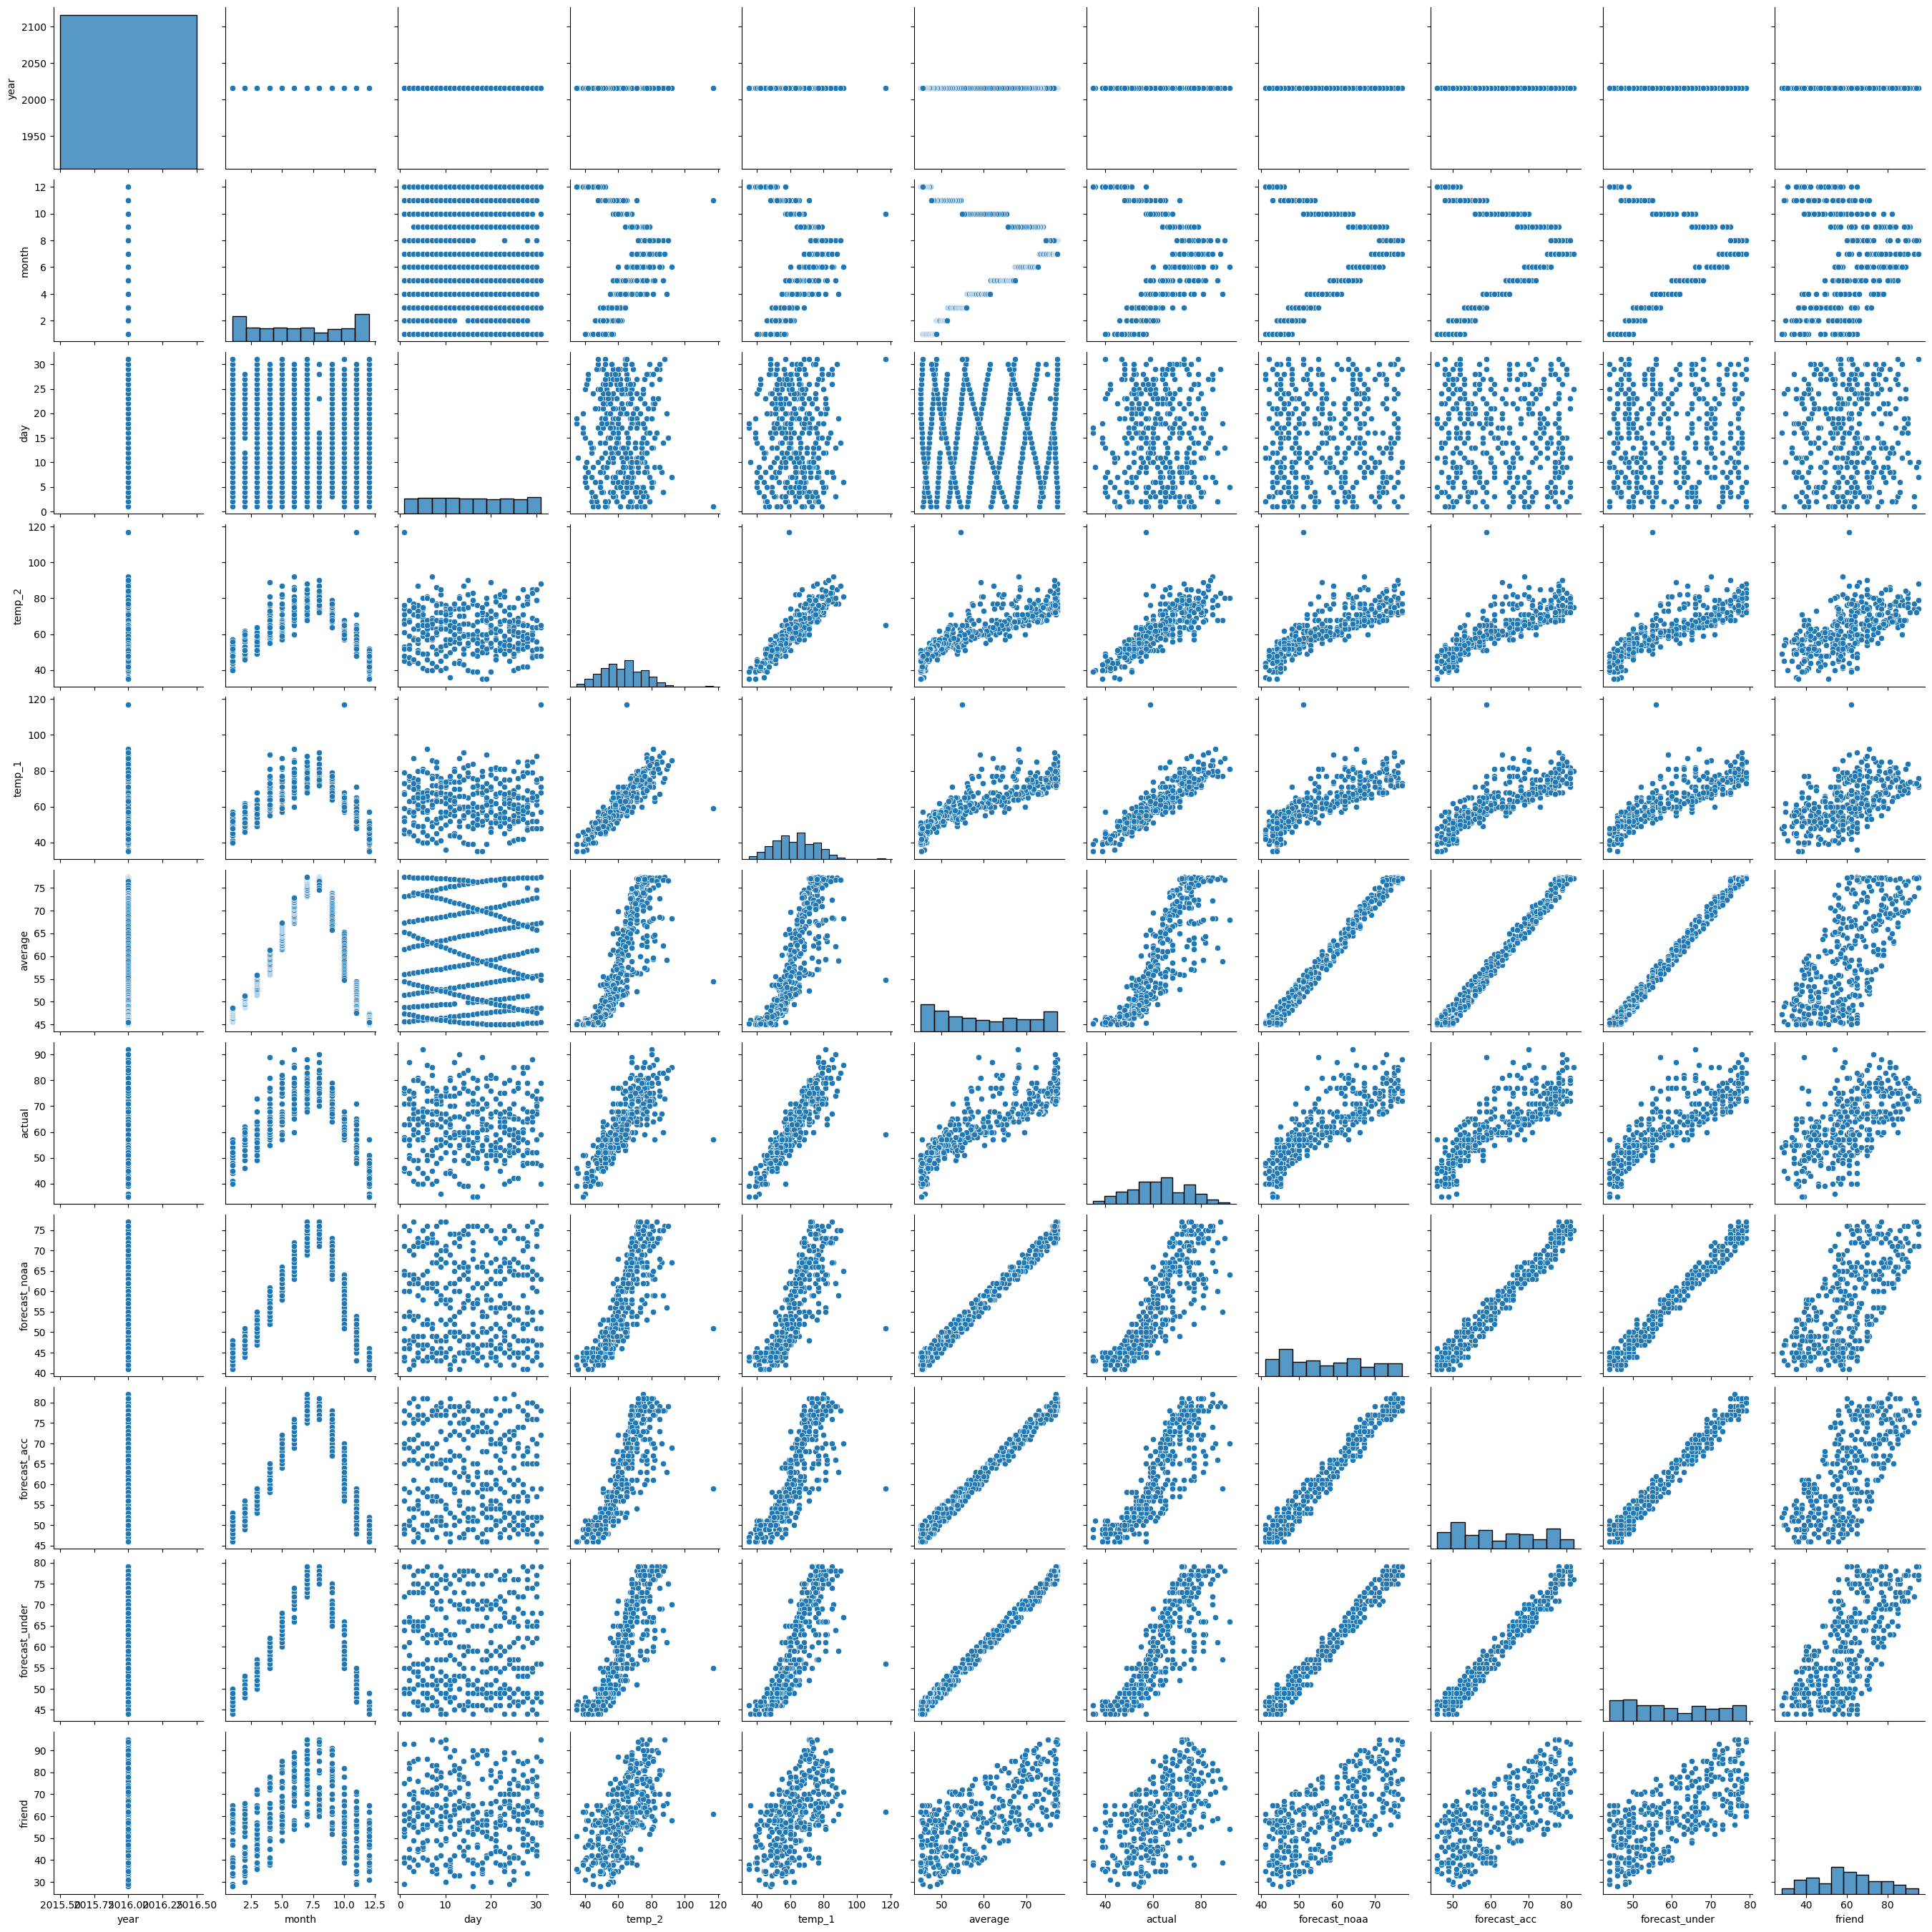

In [4]:
display(sns.pairplot(df))

In [5]:
df['date'] =df['year'].astype('str')+'-'+df['month'].astype('str')+'-'+df['day'].astype('str')
df['date'] = pd.to_datetime(df['date'])

v = pd.DataFrame(pd.date_range(start=df['date'].dt.strftime('%Y-%m-%d').min(), end=df['date'].dt.strftime('%Y-%m-%d').max()))[0].dt.strftime('%Y-%m-%d').values
a = set(v) - set(df['date'].dt.strftime('%Y-%m-%d'))
print(a)
len(a) #18 dates are missing in time series; handle later when using times series analysis

{'2016-09-02', '2016-08-20', '2016-09-01', '2016-02-14', '2016-02-29', '2016-08-27', '2016-08-31', '2016-08-26', '2016-08-24', '2016-08-19', '2016-08-18', '2016-02-13', '2016-10-30', '2016-08-29', '2016-08-22', '2016-08-17', '2016-08-25', '2016-08-21'}


18

In [6]:
display(df.corr())

<ipython-input-6-ad7c2482e61a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  display(df.corr())


,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,1.000000,-0.000412,0.047651,0.032664,0.120806,0.004529,0.131141,0.127436,0.119786,0.048145
day,NaN,-0.000412,1.000000,-0.046194,-0.000691,-0.021136,-0.021675,-0.021393,-0.030605,-0.013727,0.024592
temp_2,NaN,0.047651,-0.046194,1.000000,0.857800,0.821560,0.805835,0.813134,0.817374,0.819576,0.583758
temp_1,NaN,0.032664,-0.000691,0.857800,1.000000,0.819328,0.877880,0.810672,0.815162,0.815943,0.541282
average,NaN,0.120806,-0.021136,0.821560,0.819328,1.000000,0.848365,0.990340,0.990705,0.994373,0.689278
actual,NaN,0.004529,-0.021675,0.805835,0.877880,0.848365,1.000000,0.838639,0.842135,0.838946,0.569145
forecast_noaa,NaN,0.131141,-0.021393,0.813134,0.810672,0.990340,0.838639,1.000000,0.979863,0.985670,0.669221
forecast_acc,NaN,0.127436,-0.030605,0.817374,0.815162,0.990705,0.842135,0.979863,1.000000,0.983910,0.696054
forecast_under,NaN,0.119786,-0.013727,0.819576,0.815943,0.994373,0.838946,0.985670,0.983910,1.000000,0.691177


<ipython-input-7-96ac31f4967e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='Blues')


<Axes: >

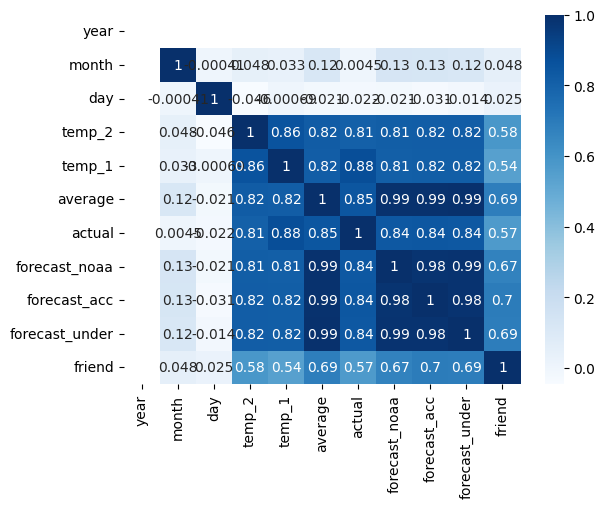

In [7]:
sns.heatmap(df.corr(), annot=True, cmap='Blues')

In [8]:
dfd = pd.get_dummies(df)
df_drop = dfd.drop(columns=['year','month','day','friend','date'])

X = df_drop.drop(columns=['actual'])
y = df_drop['actual']

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import time
import matplotlib.pyplot as plt

X_train,X_test , y_train,y_test = train_test_split(X,y,random_state=2,test_size=0.2)

In [10]:
result = []
rf = RandomForestRegressor(random_state=22)
start = time.time()
rf.fit(X_train,y_train)
end = time.time()

In [11]:
pred = rf.predict(X_test)
print('RandomForest r2_score : ',r2_score(y_test,pred))
print('learning time ',end-start)
importances = rf.feature_importances_
forest_importances = pd.Series(importances, index=X_train.columns)

RandomForest r2_score :  0.8399186619591019
learning time  0.2219226360321045


temp_1 ,average , forecast_acc 순으로 변수 중요도를 확인 할 수 있다


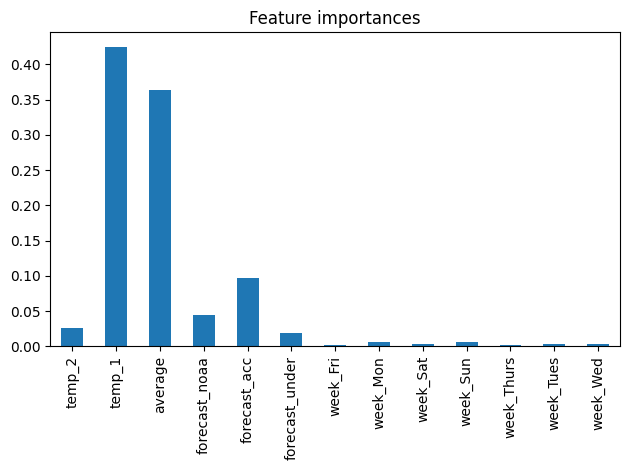

In [12]:
fig, ax = plt.subplots()
forest_importances.plot.bar( ax=ax)
ax.set_title("Feature importances")
fig.tight_layout()

print('temp_1 ,average , forecast_acc 순으로 변수 중요도를 확인 할 수 있다')

result.append([end-start,r2_score(y_test,pred)])

In [13]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score
import time
svm = SVR()

start = time.time()
svm.fit(X_train,y_train)
end = time.time()

pred = svm.predict(X_test)
print('svm r2_score : ',r2_score(y_test,pred))
print('learning time ',end-start)

result.append([end-start,r2_score(y_test,pred)])

svm r2_score :  0.8138036782618503
learning time  0.019143342971801758


In [14]:
result_df = pd.DataFrame(result,columns = ['learning time','r2_score'])
result_df.index = ['RandomForest','SVM']

display(result_df)

,learning time,r2_score
RandomForest,0.221923,0.839919
SVM,0.019143,0.813804
